In [58]:
import dustmaps
import astropy.units as u
from astropy.coordinates import SkyCoord,SphericalDifferential,ICRS,Galactic,GalacticLSR,Distance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dustmaps.edenhofer2023 import Edenhofer2023Query
from scipy import interpolate

In [5]:
edenhofer = Edenhofer2023Query(map_fname='/Users/anniegao/Documents/dustmaps_files/Dust_maps/Edenhofer_map_sketch/edenhofer_2023/mean_and_std_healpix.fits', load_samples=False, integrated=True, flavor='main', seed=None)


Integrating extinction map (this might take a couple of minutes)...
Optimizing map for querying (this might take a couple of seconds)...


## Cut the queried data above 20 Myr

<font color= '1E90FF'> From files 'table_query 1-10' modify A_G, A_BP, A_RP; </font> \
<font color= '1E90FF'> Make $M_G>4.0$ cut;  </font> \
<font color= '1E90FF'> Select CMD above 20Myr sources  </font> 

In [122]:
# table_original = pd.read_csv('/Volumes/ROCKET-nano/Gum_Nebula_source_query/table_query5.csv', index_col = 'Unnamed: 0')
table_original = pd.read_csv('/Volumes/ROCKET-nano/Gum_Nebula_source_query/table_query10.csv')

In [125]:
table_original

,source_id,ra,dec,parallax,pmra,pmdec,parallax_error,parallax_over_error,pmra_error,pmdec_error,...,ebpminrp_gspphot,ag_gspphot,A_G,A_BP,A_RP,v_l[km/s/yr],v_b[km/s/yr],x[pc],y[pc],z[pc]
0,5712299258081041280,118.661459,-21.396202,3.998799,-2.743538,5.059532,0.357011,11.200765,0.330930,0.348713,...,0.7342,1.3305,0.130733,0.181360,0.100352,-6.765309,0.289889,-128.182528,-214.212179,14.830167
1,5712301216586061696,118.750771,-21.342535,4.654097,-4.526305,0.111301,0.779629,5.969629,0.698496,0.736603,...,NaN,NaN,0.112811,0.156497,0.086595,-2.449956,-3.865973,-110.133469,-184.025612,13.112399
2,5712302006860173568,118.576552,-21.410575,4.246369,-45.603725,-0.665342,0.079210,53.609280,0.077428,0.082714,...,0.3776,0.5962,0.125044,0.173468,0.095985,-25.306822,-43.737628,-120.818288,-201.679128,13.656954
3,5712302041220230656,118.555058,-21.404725,4.258216,-3.138086,3.041142,0.683210,6.232663,0.698059,0.641133,...,NaN,NaN,0.124222,0.172327,0.095354,-4.663205,-1.251055,-120.537645,-201.088684,13.560974
4,5712303381249666432,118.597777,-21.347418,6.338767,-4.311559,-5.285379,0.054367,116.592979,0.050618,0.055600,...,0.3598,0.5608,0.022845,0.031692,0.017536,1.723118,-4.760280,-81.036661,-135.036586,9.284607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223467,5486181290207484160,112.641073,-57.406248,9.720329,-22.558146,3.004744,0.065307,148.839447,0.083639,0.118514,...,NaN,NaN,0.018894,0.026211,0.014503,-5.611530,-9.478115,-1.566483,-98.037558,-31.143157
223468,5486208911139409152,113.921272,-56.942679,9.905354,-30.464252,87.437173,0.099505,99.545975,0.121426,0.109951,...,0.4976,0.6797,0.018808,0.026091,0.014437,-43.813911,3.796922,-1.803478,-96.630025,-29.178750
223469,5486212042172963328,113.498126,-57.117194,9.290129,-37.944061,58.269634,0.022264,417.278229,0.027679,0.024639,...,0.3415,0.5311,0.019344,0.026835,0.014848,-34.752481,-5.681332,-1.796363,-102.877473,-31.616650
223470,5486273851046042496,112.079231,-57.533338,9.132836,4.381776,-38.400757,0.100310,91.046295,0.135710,0.135511,...,0.6121,0.8675,0.018975,0.026323,0.014565,19.133403,-5.507091,-1.664083,-104.152775,-33.742965


In [124]:
coords = SkyCoord(ra=table_original['ra'].values*u.deg, 
                  dec=table_original['dec'].values*u.deg, 
                  distance=(1000/table_original['parallax'].values)*u.pc)
# G-band mean value: 673 nm 
table_original['A_G'] = edenhofer(coords)*2.040684938430786
# BP-band mean value 532 nm
table_original['A_BP'] = edenhofer(coords)*2.8309452533721924
# RP-band mean value 797 nm
table_original['A_RP'] = edenhofer(coords)*1.566452145576477


In [126]:
# M_G>4.0 cut
M_G_corrected = table_original['phot_g_mean_mag']-5*np.log10(1000/table_original['parallax'])+5-table_original['A_G']
table = table_original[M_G_corrected>4.0]
len(table)

214973

In [127]:
# Extinction correction; select above 20Myr
x_value = (table['phot_bp_mean_mag']-table['A_BP'])-(table['phot_rp_mean_mag']-table['A_RP'])
y_value = table['phot_g_mean_mag']-5*np.log10(1000/table['parallax'])+5-table['A_G']
x_vals_np = np.asarray(x_value)
y_vals_np = np.asarray(y_value)

In [128]:
Myr20=pd.read_csv('/Volumes/ROCKET-nano/dustmaps_files/20Myr.txt',sep="\s+").dropna(subset=['Mass'])
x_20_data = Myr20['G_BPmag']-Myr20['G_RPmag']
y_20_data = Myr20['Gmag']
#keep data brighter than 4.0 mag to ensure monotonic region for interpolation, use 3.8 to ensure the filtered data correct
limit_index = np.where(y_20_data<=3.8)[0][0]
x_20=x_20_data[:limit_index]
y_20=y_20_data[:limit_index]

f_interp_20 = interpolate.interp1d(x_20, y_20, fill_value="extrapolate")

In [129]:
above_20 = (y_vals_np<f_interp_20(x_vals_np))
above20Myr=table[above_20]

/Users/anniegao/anaconda3/envs/ism/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


In [130]:
# above20Myr.to_csv('/Volumes/ROCKET-nano/Gum_Nebula_source_query/20Myr_new_10.csv',index=False)

In [133]:
import glob
ab20Myr = []
Myr_20 = glob.glob('/Volumes/ROCKET-nano/Gum_Nebula_source_query/20Myr_new_*.csv')
for obj in Myr_20:
    tab = pd.read_csv(obj, index_col=[0])
    ab20Myr.append(tab)
    print(len(tab))
Young_stars_20Myr = pd.concat(ab20Myr)

3866
1390
2383
1537
9435
9783
6594
31899
3545
2134


In [138]:
Young_stars_20Myr['BP-RP'] = (Young_stars_20Myr['phot_bp_mean_mag']-Young_stars_20Myr['A_BP'])-(Young_stars_20Myr['phot_rp_mean_mag']-Young_stars_20Myr['A_RP'])
Young_stars_20Myr['M_G'] = Young_stars_20Myr['phot_g_mean_mag']-5*np.log10(1000/Young_stars_20Myr['parallax'])+5-Young_stars_20Myr['A_G']

In [160]:
# Transform in LSR frame
coord0 = SkyCoord(ra=Young_stars_20Myr['ra']*u.deg, dec=Young_stars_20Myr['dec']*u.deg, 
                 distance=(1000/Young_stars_20Myr['parallax'].values)*u.pc, 
                 pm_ra_cosdec=Young_stars_20Myr['pmra'].values*u.mas/u.yr,
                   pm_dec=Young_stars_20Myr['pmdec'].values*u.mas/u.yr, 
                  radial_velocity=0*u.km/u.yr)

In [163]:
# not work for uvw, but work for vl, vb to convert to local
pm_l=coord0.transform_to('galacticlsr').pm_l_cosb.value
pm_b=coord0.transform_to('galacticlsr').pm_b.value
Young_stars_20Myr['v_l[km/s/yr]']=4.7047*pm_l/Young_stars_20Myr['parallax']
Young_stars_20Myr['v_b[km/s/yr]']=4.7047*pm_b/Young_stars_20Myr['parallax']

In [167]:
Young_stars_20Myr.to_csv('/Volumes/ROCKET-nano/Gum_Nebula_source_query/20Myr_new.csv')
Young_stars_20Myr.shape

(72566, 46)

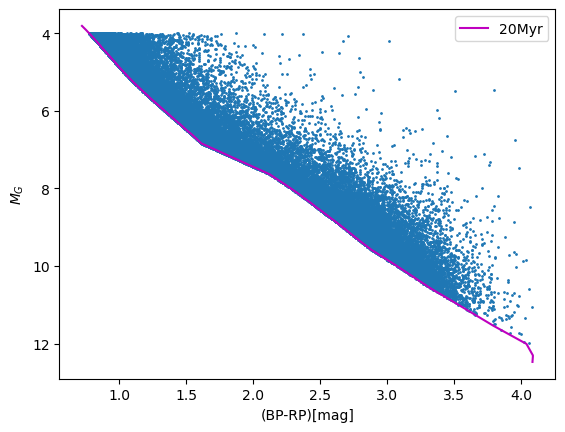

In [141]:
plt.scatter(Young_stars_20Myr['BP-RP'], Young_stars_20Myr['M_G'], s=1)
plt.plot(x_20, y_20, 'm', label='20Myr')
plt.gca().invert_yaxis()
plt.xlabel('(BP-RP)[mag]')
plt.ylabel('$M_{G}$')
plt.legend()

In [8]:
Leike20Myr = pd.read_csv('/Volumes/ROCKET-nano/Gum_Nebula_source_query/20Myr_LSR.csv', index_col = 'Unnamed: 0')

In [19]:
#new_20Myr with Edenhofer map
table0_comp = table0.drop(['BP-RP','M_G'], axis=1)
table0_comp

,source_id,ra,dec,parallax,pmra,pmdec,parallax_error,parallax_over_error,pmra_error,pmdec_error,...,ebpminrp_gspphot,ag_gspphot,A_G,A_BP,A_RP,v_l[km/s/yr],v_b[km/s/yr],x[pc],y[pc],z[pc]
0,5422770530492397312,141.196184,-46.204451,1.101479,-12.632735,8.080462,0.027198,40.498573,0.029572,0.028030,...,0.8797,1.6076,1.086184,1.506811,0.833766,-51.693589,-5.212713,0.023304,-906.597684,48.050424
1,5422764654977135872,141.189401,-46.212544,1.054851,-0.870413,1.274730,0.023530,44.829887,0.025060,0.025393,...,0.7484,1.3634,1.141048,1.582921,0.875881,4.266553,9.177188,0.062414,-946.680597,50.024600
2,5422640685040778752,140.309780,-46.827128,1.070346,-5.547077,5.438559,0.025051,42.726696,0.026911,0.025254,...,0.9822,1.7800,1.055502,1.464248,0.810215,-23.126892,7.314002,0.089274,-933.611742,35.249510
3,5422764311379742336,141.132172,-46.260755,1.056148,-9.762443,6.587592,0.056612,18.655821,0.057062,0.068305,...,1.2767,2.3199,1.195070,1.657864,0.917349,-40.584448,-1.645350,0.151992,-945.571466,48.937615
4,5422771973601490560,141.347057,-46.116919,1.099819,0.351795,0.709946,0.024375,45.120293,0.025442,0.025645,...,1.1628,2.1191,0.957018,1.327626,0.734618,9.978663,11.081354,0.240136,-907.849273,50.272118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72561,5480524131083131776,107.008126,-58.678797,4.954940,-12.347469,12.223199,0.050956,97.240288,0.060586,0.073033,...,0.5082,0.7016,0.018493,0.025654,0.014195,-3.835979,-5.163296,-2.526121,-188.575172,-71.859971
72562,5295430625677507456,115.982838,-57.552945,5.433219,-11.850016,46.474272,0.137265,39.581963,0.165212,0.168824,...,NaN,NaN,0.023636,0.032789,0.018143,-29.711061,11.687931,-0.009250,-176.883569,-50.869342
72563,5486048283659584768,111.725346,-57.915087,5.356369,-34.641662,-13.758240,0.010545,507.948761,0.012448,0.014865,...,0.0380,0.0717,0.022385,0.031054,0.017183,10.590081,-29.750151,-1.917165,-177.273037,-58.524370
72564,5486102876987320576,113.417687,-57.766869,5.560842,-8.466505,8.634441,0.016865,329.733185,0.020597,0.019349,...,0.0745,0.1381,0.022388,0.031057,0.017185,1.374131,-0.434128,-1.184715,-171.613352,-53.720370


In [20]:
Leike20Myr_comp = Leike20Myr

In [33]:
overlap = np.intersect1d(table0['source_id'].values, Leike20Myr_comp['source_id'].values)
# table0[table0['source_id'] = overlap]

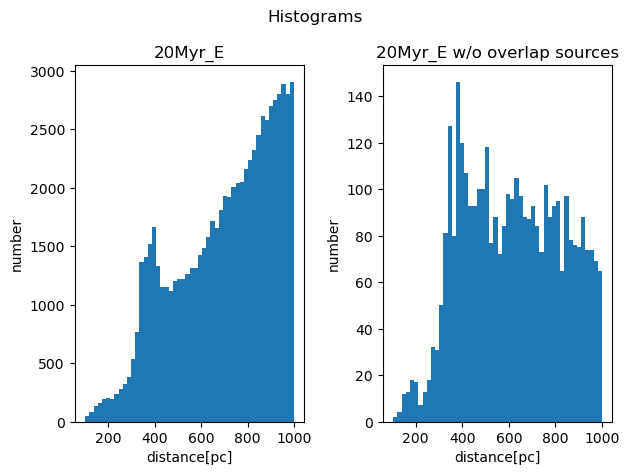

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Histograms')

ax1.hist(1000/(table0['parallax'].values), bins=50)
ax1.set_title('20Myr_E')
ax1.set(xlabel='distance[pc]', ylabel='number')
ax2.hist(1000/(edenhofer_only['parallax'].values), bins=50)
ax2.set_title('20Myr_E w/o overlap sources')
ax2.set(xlabel='distance[pc]', ylabel='number')

fig.tight_layout()
plt.show()



## HDBSCAN clustering

<font color= '1E90FF'> Select sources $v_{tot}<40 km/s/yr$ </font>\
<font color= '1E90FF'> Use HDSCAN clustering</font>

In [1]:
import astropy.units as u
from astropy.coordinates import SkyCoord,SphericalDifferential,ICRS,Galactic,GalacticLSR,Distance
import pandas as pd
import numpy as np
import matplotlib
import hdbscan

In [2]:
table0 = pd.read_csv('/Volumes/ROCKET-nano/Gum_Nebula_source_query/20Myr_new.csv')

In [90]:
v_tot40 = table0[np.sqrt(table0['v_l[km/s/yr]']**2 + table0['v_b[km/s/yr]']**2)<40]
v_tot40.index.name = 'ID'

In [92]:
list_to_use = v_tot40[['source_id','ra','dec', 'parallax','pmra','pmdec',
                                           'x[pc]','y[pc]', 'z[pc]','l','b',
                                           'v_l[km/s/yr]','v_b[km/s/yr]']]

In [93]:
trial_data=v_tot40[['x[pc]','y[pc]', 'z[pc]','v_l[km/s/yr]','v_b[km/s/yr]']]
trial_data = trial_data.copy()
trial_data['v_l[km/s/yr]']=v_tot40['v_l[km/s/yr]']*6
trial_data['v_b[km/s/yr]']=v_tot40['v_b[km/s/yr]']*6

In [95]:
trial_data

,x[pc],y[pc],z[pc],v_l[km/s/yr],v_b[km/s/yr]
ID,,,,,
1,0.062414,-946.680597,50.024600,25.599321,55.063129
2,0.089274,-933.611742,35.249510,-138.761352,43.884014
4,0.240136,-907.849273,50.272118,59.871977,66.488124
5,0.296649,-867.097808,38.736863,-53.876547,41.488248
6,0.361546,-925.677873,53.380828,159.418776,28.290322
...,...,...,...,...,...
72561,-2.526121,-188.575172,-71.859971,-23.015874,-30.979773
72562,-0.009250,-176.883569,-50.869342,-178.266366,70.127588
72563,-1.917165,-177.273037,-58.524370,63.540483,-178.500908


In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=14,
                            min_samples=12, 
                            cluster_selection_epsilon=5.2,
                            cluster_selection_method='leaf').fit(trial_data)
clustered_data=trial_data.copy()

In [ ]:
clustered_data['labels']=clusterer.labels_
clustered_data['probabilities'] = clusterer.probabilities_
# cluster_labels = clusterer.fit_predict(trial_data)
# sorted(set(clusterer.probabilities_.tolist()))